# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/)

Inkubator Uniwersytetu Warszawskiego

## 8.  Titanic project

!["titanic"](https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic-New_York_Herald_front_page.jpeg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')

%matplotlib inline

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

## Data exploration

In [2]:
passengers = pd.read_csv("data/titanic.csv")

Let's take a look at the first 10 rows of the data.

In [3]:
passengers.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


Description:

- _Survived_ - Survival (0 = No, 1 = Yes)
- _Pclass_ - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- _Sex_ - sex	
- _Age_  - age in years	
- _SibSp_ - nubmer of siblings / spouses aboard the Titanic	
- _Parch_ - number of parents / children aboard the Titanic	
- _Ticket_ - ticket number	
- _Fare_ - passenger fare	
- _Cabin_ - cabin number	
- _Embarked_ - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


Let's summarize quantitative data.

In [5]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 67.0+ KB


In [4]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Visualization

In this part we will make some plots to better understand what our data can tell us about passengers.

Text(0.5,0,'Passenger Class')

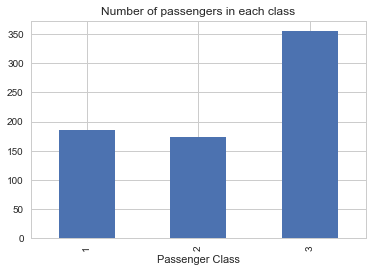

In [6]:
passengers.groupby('Pclass').size().plot(kind='bar')
plt.title('Number of passengers in each class')
plt.xlabel('Passenger Class')

Text(0.5,1,'Number of passengers depending on gender')

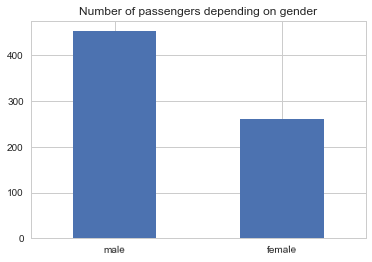

In [7]:
passengers['Sex'].value_counts().plot(kind='bar', rot=1)
plt.title('Number of passengers depending on gender')

* Show how many survived.

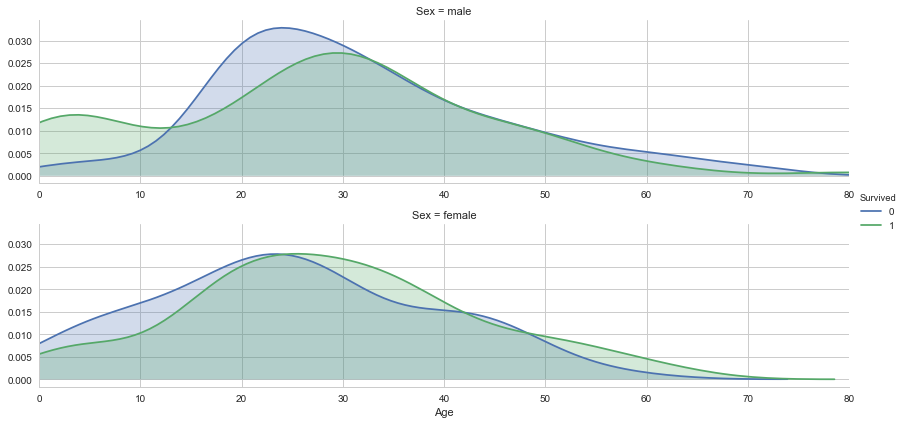

In [8]:
facet = sns.FacetGrid(passengers, hue='Survived', aspect=4, row='Sex')
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, passengers['Age'].max()))
facet.add_legend()

/Users/pmigdal/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  if __name__ == '__main__':


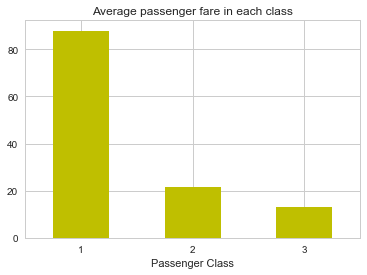

In [9]:
grdata = pd.groupby(passengers, 'Pclass')
grdata.Fare.mean().plot('bar', color='y', rot=1)
plt.title('Average passenger fare in each class')
plt.xlabel('Passenger Class')
plt.show()

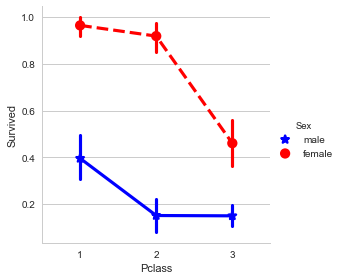

In [10]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=passengers,
              palette={"male": "blue", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"])

In the first picture we see an average fare depending on class. It's not surprising that the highest prices were in first class, but the difference between first and second is significant. What about chances to survive? From the second picture we see that well-off passengers had greater chances to survive, which also agree with image of the catastrophe from James Cameron movie.

## Warm-up exercises

(a) Create factorplot for number of parents / children aboard the Titanic.

(b) What does it tell about survival?

## Filling-in missing data

In [ ]:
# warning - it changes dataset!
passengers['Fare'].fillna(passengers['Fare'].median(), inplace=True)
passengers['Embarked'].fillna('S', inplace=True)

## Prediction

Your task is to write classifier, which predicts `Survived` label from given Titanic data.

Before writing any code, think about following questions:

- what kind of problem you approach: regression or classification?

- what kind of algorithms you can use?

- what features are the most informative?

- how to test your classifier performance?

In [13]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
passengers['is_female'] = passengers['Sex'] == 'female'

In [20]:
X = passengers[['Pclass', 'Age', 'is_female', 'SibSp', 'Parch',
                'Fare', 'Embarked']]
X = pd.get_dummies(X, columns=['Embarked'])

y = passengers['Survived']

Let's split the data into train and test sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

That's all you need to perform the task. Good luck :)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf = LogisticRegression(C=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.76923076923076927

In [54]:
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.77622377622377625

In [55]:
1 - y_test.mean()

0.6083916083916083

In [56]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)